In [3]:
import re
import time
import math
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA

# Predicting Airline Arrival Delays

Flight delays are a hastle for passengers and the airlines themselves. It costs all involved time and money. Being able to predict how flight delays can help the airlines make better decisions to prevend future delays and it could help passengers be able to plan accordingly for other travel arrangements. The focus of this report will be on predicting arrival delays. For our purposes a flight will only be considered late if it is over 30 minutes delayed.

In [4]:
# Load data
arrivals = pd.read_csv('C:/Users/keith/Desktop/Thinkful/2008.csv',encoding = "ISO-8859-1")

pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows


In [5]:
arrivals.shape

(7009728, 29)

In [6]:
arrivals.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


# Data Description

The data we will be exploring comes from The Bureau of Transportation Statistics and the particular data set is from 2008. It consists of 29 features and 7,009,728 rows of flight observations.  

In [7]:
arrivals.columns 

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

### Brief description of features

Name	Description<br/>
1	**Year:**	      2008<br/>
2	**Month:**	1-12<br/>
3	**DayofMonth:**	1-31<br/>
4	**DayOfWeek:**	1 (Monday) - 7 (Sunday)<br/>
5	**DepTime:**	actual departure time (local, hhmm)<br/>
6	**CRSDepTime:**	scheduled departure time (local, hhmm)<br/>
7	**ArrTime:**	actual arrival time (local, hhmm)<br/>
8	**CRSArrTime:**	scheduled arrival time (local, hhmm)<br/>
9	**UniqueCarrier:**	unique carrier code<br/>
10	**FlightNum:**	flight number<br/>
11	**TailNum:**	plane tail number<br/>
12	**ActualElapsedTime:**	in minutes<br/>
13	**CRSElapsedTime:**	in minutes<br/>
14	**AirTime:**	in minutes<br/>
15	**ArrDelay:**	arrival delay, in minutes<br/>
16	**DepDelay:**	departure delay, in minutes<br/>
17	**Origin:**	origin IATA airport code<br/>
18	**Dest:**	destination IATA airport code<br/>
19	**Distance:**	in miles<br/>
20	**TaxiIn:**	taxi in time, in minutes<br/>
21	**TaxiOut:**	taxi out time in minutes<br/>
22	**Cancelled:**	was the flight cancelled?<br/>
23	**CancellationCode:**	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)<br/>
24	**Diverted:**	1 = yes, 0 = no<br/>
25	**CarrierDelay:**	in minutes<br/>
26	**WeatherDelay:**	in minutes<br/>
27	**NASDelay:**	in minutes<br/>
28	**SecurityDelay:**	in minutes<br/>
29	**LateAircraftDelay:**	in minutes<br/>

# Data cleaning

In [8]:
arrivals.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

There are several columns with missing data. Since we are only concerned with delay flights we can drop the "Cancelled" and "CanellationCode" columns.

In [9]:
# dropping 'CancellationCode','Cancelled' columns

variables_to_remove = ['CancellationCode','Cancelled','Diverted','FlightNum','TailNum']
arrivals = arrivals.drop(variables_to_remove, 1)

Over half of our data will be missing if we simply drop the rows with null values. Instead we will make a big assumption and say that there were no delays of the types with the missing values and replace the null values with zeros for zero delayed minutes.

In [10]:
arrivals.fillna({'CarrierDelay':0,
       'WeatherDelay':0, 'NASDelay':0, 'SecurityDelay':0, 'LateAircraftDelay':0}, inplace=True)

In [11]:
len(arrivals)

7009728

In [12]:
arrivals.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime              136246
CRSDepTime                0
ArrTime              151649
CRSArrTime                0
UniqueCarrier             0
ActualElapsedTime    154699
CRSElapsedTime          844
AirTime              154699
ArrDelay             154699
DepDelay             136246
Origin                    0
Dest                      0
Distance                  0
TaxiIn               151649
TaxiOut              137058
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

From here we will drop the rows containing the rest of the null values and that will still leave us with plenty of data.

In [13]:
arrivals.dropna(inplace=True)

In [14]:
arrivals.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [15]:
len(arrivals)/7009728*100

97.79308127219772

In [16]:
len(arrivals)

6855029

After handling all of the null values we are still left with 97% of the original data.

Next, we are going to make a new categorical feature marks if an arrival is late or not. The ArrDelay feature shows how many minutes that a flight was delayed. We will use it to make the features "Late Arrivals" and "Late Departures" which we will label a "1" for an arrival or departure that was over 30 min delayed and a zero for all others.  

In [17]:
arrivals['Late_arrivals'] = np.where(arrivals['ArrDelay']>30, 1, 0)
arrivals['Late_departures'] = np.where(arrivals['DepDelay']>30, 1, 0)

To reduce some dimention we will combine the "Year", "Month",and "DayOfMonth" features to one "date" feature in datetime format.

In [18]:
arrivals['Day'] = arrivals['DayofMonth'] 
arrivals['date'] = pd.to_datetime(arrivals[['Year','Month','Day']])
arrivals = arrivals.drop(['Year','DayofMonth','Day','Month'],1)

In [19]:
# dictionary to match carrier codes with names
carrier_names = {'9E':'Endeavor Air Inc.',
                 'AA':'American Airlines Inc.',
                 'AS':'Alaska Airlines Inc.',
                 'B6':'JetBlue Airways',
                 'DL':'Delta Air Lines Inc.',
                 'EV':'ExpressJet Airlines Inc.',
                 'F9':'Frontier Airlines Inc.',
                 'G4':'Allegiant Air',
                 'HA':'Hawaiian Airlines Inc.',
                 'MQ':'Envoy Air',
                 'NK':'Spirit Air Lines',
                 'OH':'PSA Airlines Inc.',
                 'OO':'SkyWest Airlines Inc.',
                 'UA':'United Air Lines Inc.',
                 'WN':'Southwest Airlines Co.',
                 'YV':'Mesa Airlines Inc.',
                 'YX':'Republic Airline',
                 'XE':'ExpressJet Airlines',
                 'US':'US Airways',
                 'FL':'AirTran Airways',
                 'NW':'Northwest Airlines',
                 'AQ':'Aloha',
                 'CO':'Continental Airlines'}
carriers = []
for i in arrivals.UniqueCarrier:
    carriers.append(carrier_names[i])
arrivals['carriers'] = carriers

 # Exploratory Data Analysis
 

In [20]:
# Summary statistics

arrivals.describe()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Late_arrivals,Late_departures
count,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06,6.855029e+06
mean,3.925802e+00,1.333775e+03,1.325037e+03,1.481266e+03,1.493715e+03,1.273224e+02,1.290778e+02,1.040186e+02,8.168452e+00,9.923845e+00,7.287438e+02,6.860150e+00,1.644368e+01,3.508113e+00,6.759588e-01,3.817854e+00,1.667622e-02,4.620001e+00,1.314944e-01,1.181181e-01
std,1.988459e+00,4.780574e+02,4.643129e+02,5.051322e+02,4.826642e+02,7.018731e+01,6.953271e+01,6.743980e+01,3.850194e+01,3.520386e+01,5.632447e+02,4.931224e+00,1.131062e+01,2.001675e+01,9.284375e+00,1.665013e+01,8.673703e-01,2.043151e+01,3.379403e-01,3.227479e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.200000e+01,-1.410000e+02,0.000000e+00,-5.190000e+02,-5.340000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,7.700000e+01,8.000000e+01,5.500000e+01,-1.000000e+01,-4.000000e+00,3.260000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,1.325000e+03,1.317000e+03,1.512000e+03,1.515000e+03,1.100000e+02,1.110000e+02,8.600000e+01,-2.000000e+00,-1.000000e+00,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.905000e+03,1.570000e+02,1.590000e+02,1.320000e+02,1.200000e+01,8.000000e+00,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,1.379000e+03,6.600000e+02,1.350000e+03,2.461000e+03,2.467000e+03,4.962000e+03,3.080000e+02,4.290000e+02,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03,1.000000e+00,1.000000e+00


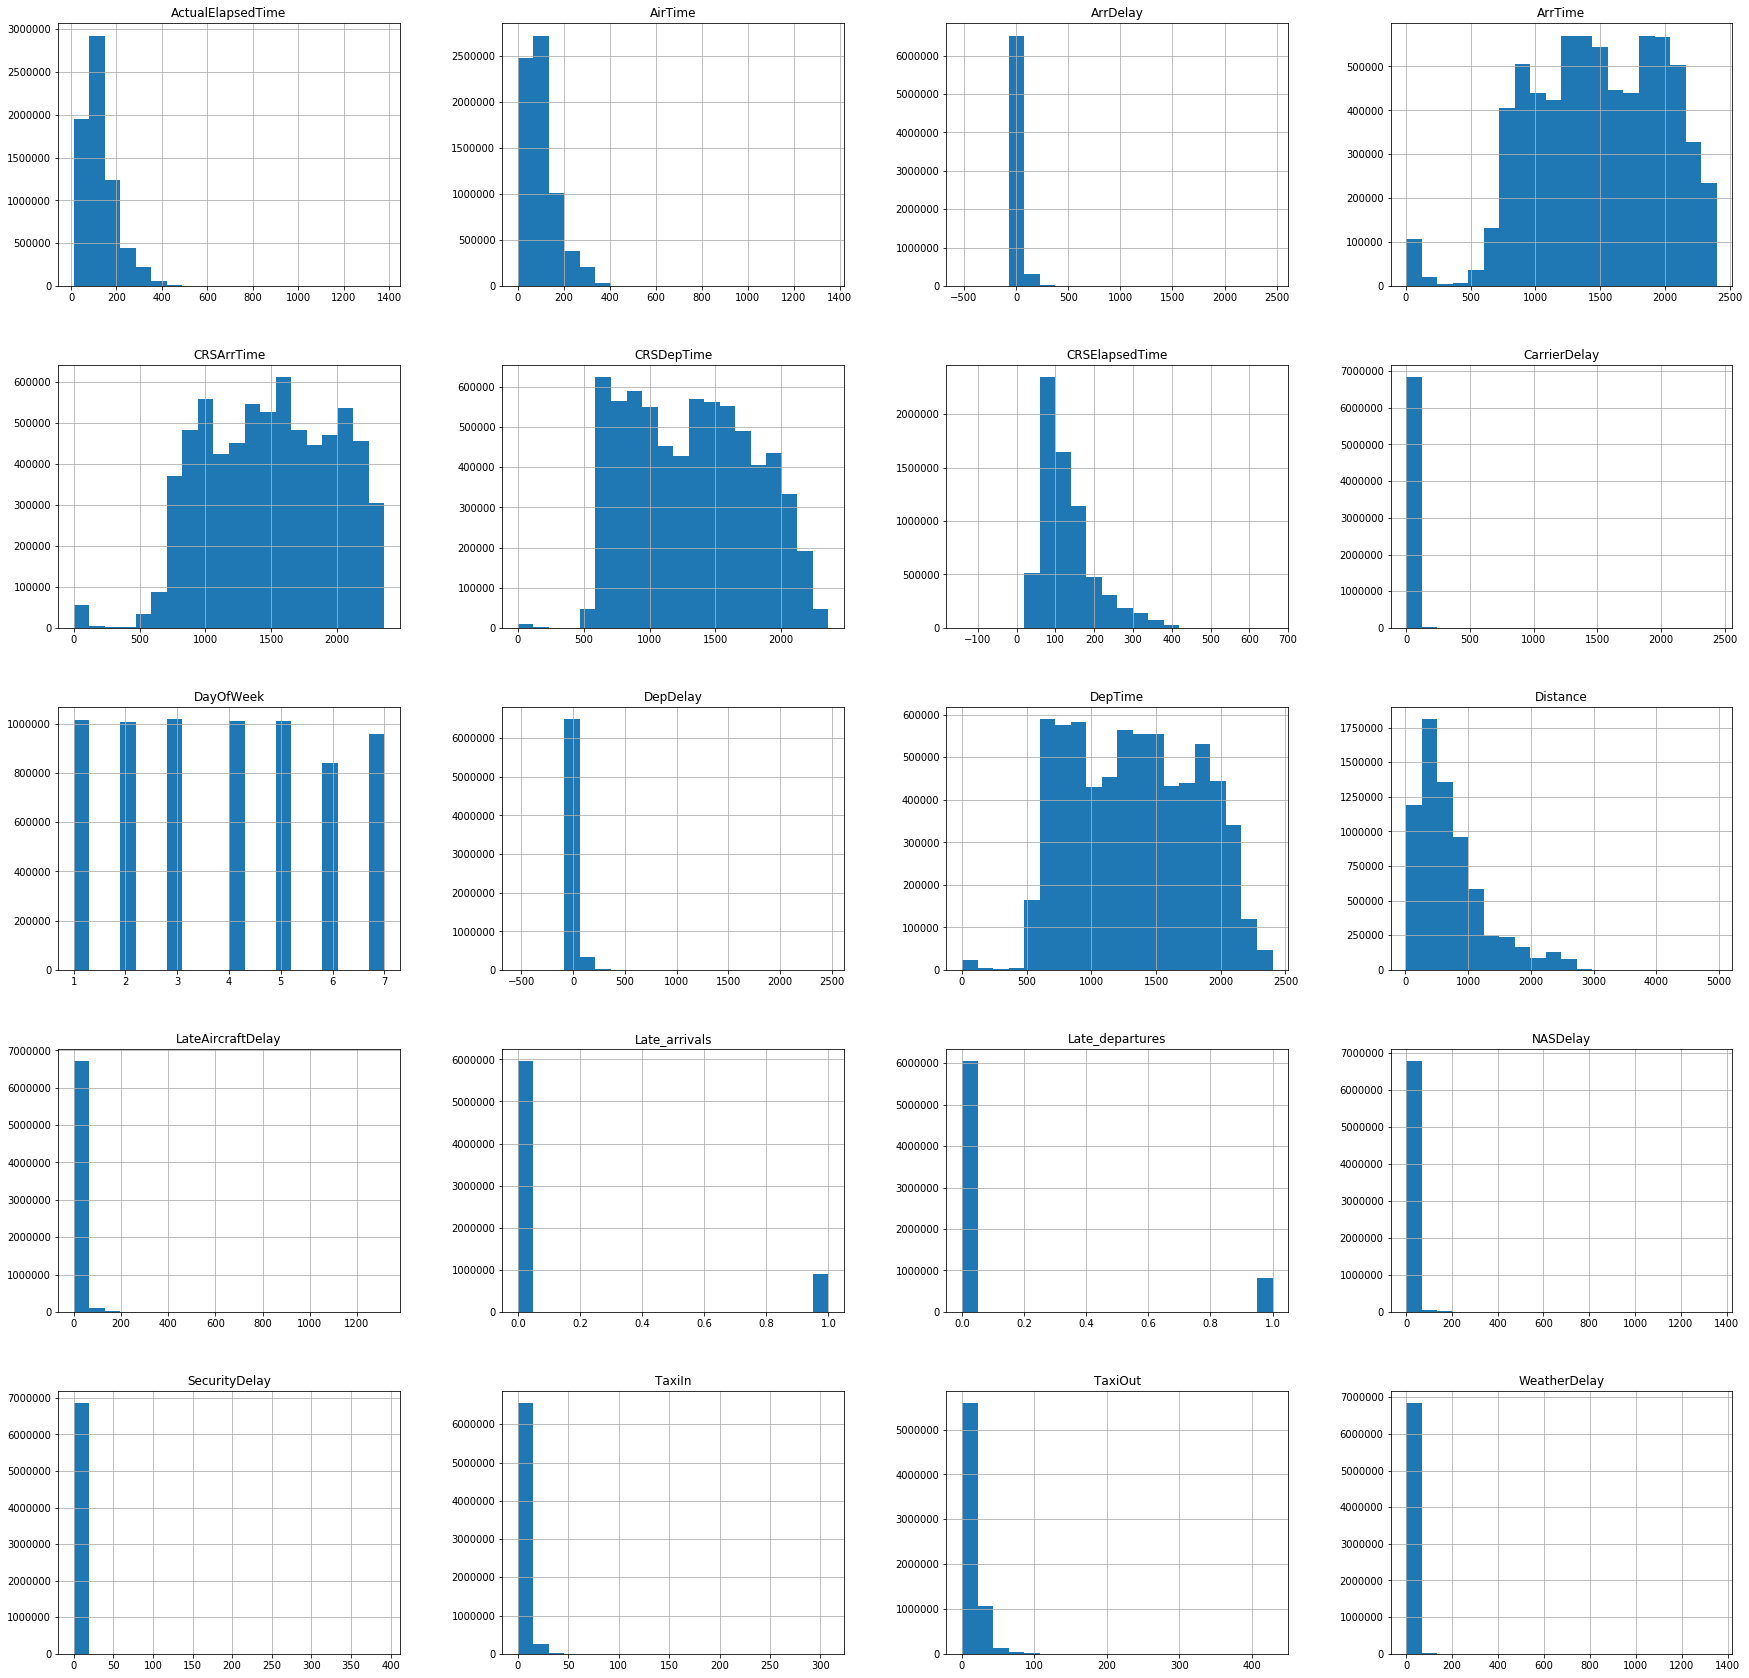

In [21]:
# Taking a look at the distribution of the features

arrivals.hist(figsize=(30,30),bins=20)
plt.show()

In [22]:
# Taking a look at how the target variable correlates with the other features

arrivals.corr()['ArrDelay']

DayOfWeek            0.010558
DepTime              0.178275
CRSDepTime           0.116894
ArrTime              0.066021
CRSArrTime           0.113087
ActualElapsedTime    0.093925
CRSElapsedTime       0.012641
AirTime              0.034732
ArrDelay             1.000000
DepDelay             0.931391
Distance             0.006551
TaxiIn               0.123065
TaxiOut              0.322101
CarrierDelay         0.564285
WeatherDelay         0.280095
NASDelay             0.513837
SecurityDelay        0.025578
LateAircraftDelay    0.605675
Late_arrivals        0.739601
Late_departures      0.702242
Name: ArrDelay, dtype: float64

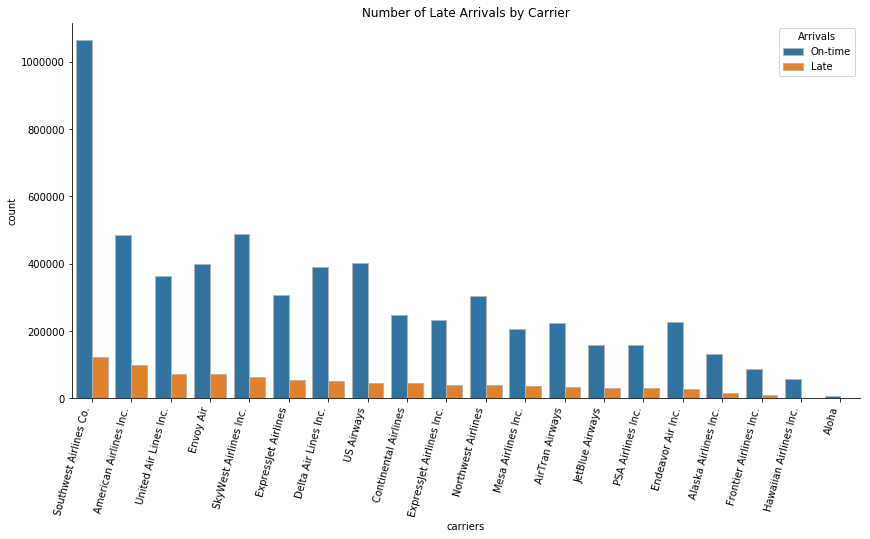

In [23]:
# plot counts of late/on-time flights per carrier

arrivals['carriers'] = carriers
sorted_carrier = list(arrivals[arrivals.Late_arrivals==1].carriers.value_counts().index)
ax = sns.catplot(x="carriers", hue="Late_arrivals", kind="count",
             edgecolor=".7", data=arrivals, order=sorted_carrier, 
            legend=False,  height=6, aspect=2)
 

ax.set_xticklabels(rotation=75,ha='right')
plt.legend(title='Arrivals', loc='best', labels=['On-time', 'Late'])
plt.title('Number of Late Arrivals by Carrier')
plt.show()

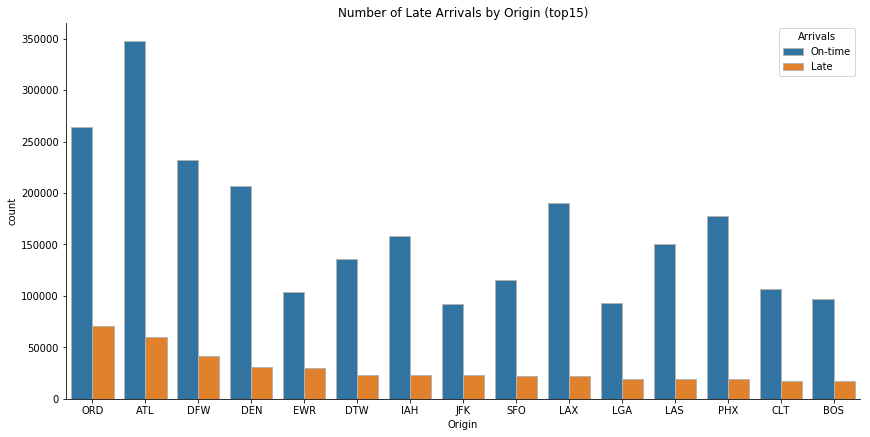

In [24]:
# plot counts of late/on-time flights per airport of origin

sorted_origin = list(arrivals[arrivals.Late_arrivals==1].Origin.value_counts().head(15).index)
sns.catplot(x="Origin", hue="Late_arrivals", kind="count",
             edgecolor=".7", data=arrivals,order=sorted_origin,
            legend=False, height=6,aspect=2) 
plt.legend(title='Arrivals', loc='best', labels=['On-time', 'Late'])
plt.title('Number of Late Arrivals by Origin (top15)')
plt.show()   
 

The above two plots show the number of late arrivals compared to the number of on-time arrivals per carrier and per airport of origin, respectively. It was better to plot it this way instead of plotting the means because there were some origins that only had one sample and it would be misleading.

Now we will take a look at a breakdown of how each carrier is affected by each type of delay

,ArrDelay,LateAircraftDelay,CarrierDelay,DepDelay,WeatherDelay,NASDelay,SecurityDelay
carriers,,,,,,,
JetBlue Airways,92.113610,37.170662,18.975717,78.996500,1.672025,34.246763,0.048442
Mesa Airlines Inc.,89.576462,20.545600,45.073370,83.939635,4.680774,19.118037,0.158680
ExpressJet Airlines,87.362891,32.312185,19.282004,77.318428,4.210174,31.419150,0.139378
United Air Lines Inc.,85.473680,40.648836,20.305456,77.960032,2.695965,21.804942,0.018481
ExpressJet Airlines Inc.,85.078774,13.652709,36.326891,78.331327,13.104828,21.930732,0.063614
Continental Airlines,84.560972,25.789815,18.933780,74.133112,4.143943,35.563798,0.129636
Hawaiian Airlines Inc.,84.354040,24.199350,58.187576,70.145351,1.671133,0.244823,0.051157
SkyWest Airlines Inc.,83.098246,32.197948,21.699561,74.803509,4.539113,24.529621,0.132002
AirTran Airways,82.912931,48.122450,10.094410,71.550725,1.047055,23.649016,0.000000


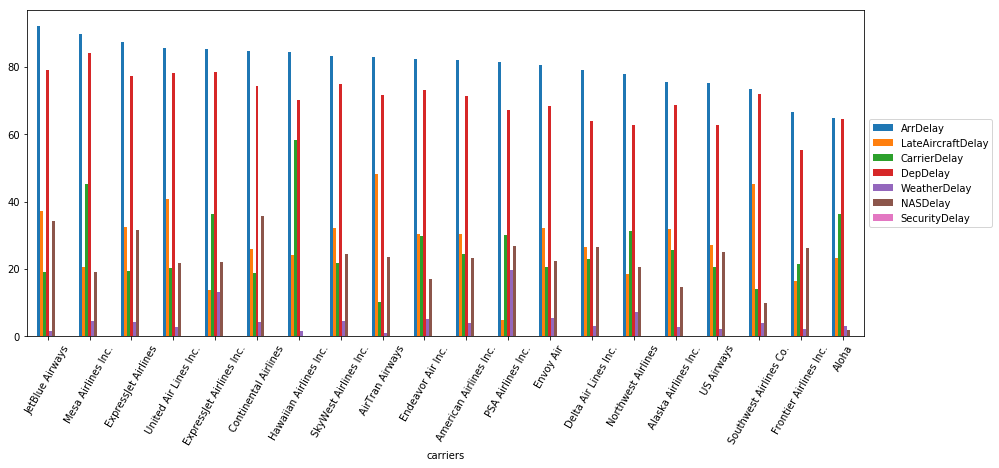

In [25]:
# plot of average minutes of delay type per carrier
arrivals[arrivals.Late_arrivals==1].groupby('carriers')['ArrDelay','LateAircraftDelay','CarrierDelay',
                                                        'DepDelay','WeatherDelay','NASDelay','SecurityDelay'].mean().sort_values(by='ArrDelay',ascending=False).plot(kind='bar',figsize=(15,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=60)
# table of average minutes of delay type per carrier
arrivals[arrivals.Late_arrivals==1].groupby('carriers')['ArrDelay','LateAircraftDelay','CarrierDelay',
                                                        'DepDelay','WeatherDelay','NASDelay','SecurityDelay'].mean().sort_values(by='ArrDelay',ascending=False)

We can see from the bar plot that departure delays are the most significant of all of the other types of delays.

In [26]:
# number of flight per carrier in 2008

arrivals.carriers.value_counts()

Southwest Airlines Co.      1186911
American Airlines Inc.       585485
SkyWest Airlines Inc.        553412
Envoy Air                    471161
US Airways                   446086
Delta Air Lines Inc.         443934
United Air Lines Inc.        437979
ExpressJet Airlines          363414
Northwest Airlines           344110
Continental Airlines         293855
ExpressJet Airlines Inc.     274867
AirTran Airways              258713
Endeavor Air Inc.            254322
Mesa Airlines Inc.           245131
JetBlue Airways              192114
PSA Airlines Inc.            190695
Alaska Airlines Inc.         148492
Frontier Airlines Inc.        95384
Hawaiian Airlines Inc.        61212
Aloha                          7752
Name: carriers, dtype: int64

In [27]:
# create new feature that bins flights by season

bins=['2008-01-01','2008-03-19','2008-06-01','2008-09-23','2008-12-21','2008-12-31']
bin_names = ['winter','spring','summer','fall','Winter']
arrivals['seasons'] = pd.cut(arrivals.date, pd.to_datetime(bins),labels=bin_names)
arrivals['seasons'] = arrivals['seasons'].str.lower()

In [28]:
# create ne feature that bins flights by time of day

bins=[0,600,1159,1700,2000,2359]
bin_names = ['night','morning','afternoon','evening','Night']
arrivals['time_of_day'] = pd.cut(arrivals.ArrTime, bins,labels=bin_names)
arrivals['time_of_day'] = arrivals['time_of_day'].str.lower()

In [29]:
#average delays by season
arrivals[['ArrDelay','WeatherDelay','LateAircraftDelay',
          'CarrierDelay','SecurityDelay','NASDelay']].groupby(arrivals.seasons).mean()

,ArrDelay,WeatherDelay,LateAircraftDelay,CarrierDelay,SecurityDelay,NASDelay
seasons,,,,,,
fall,4.345548,0.493398,3.550071,2.614045,0.010821,3.213152
spring,7.033542,0.453012,4.043349,3.233414,0.016162,3.450412
summer,8.336891,0.747849,4.500402,3.600772,0.015544,4.008711
winter,12.410679,0.942106,6.244061,4.434929,0.023595,4.437797


In [30]:
#average delays by time of day
arrivals[['ArrDelay','WeatherDelay','LateAircraftDelay',
          'CarrierDelay','SecurityDelay','NASDelay']].groupby(arrivals.time_of_day).mean()

,ArrDelay,WeatherDelay,LateAircraftDelay,CarrierDelay,SecurityDelay,NASDelay
time_of_day,,,,,,
afternoon,5.120371,0.475024,2.971315,3.137575,0.014696,2.973714
evening,10.165684,0.734929,5.308944,3.641301,0.014898,4.698797
morning,-0.694553,0.258270,0.660629,1.858909,0.014285,1.902065
night,21.732183,1.424254,11.253867,5.952219,0.023750,6.637234


In [31]:
#average delays by month

print('Mean Delays per Month')
arrivals[['ArrDelay','WeatherDelay','LateAircraftDelay',
          'CarrierDelay','SecurityDelay','NASDelay']].groupby(arrivals.date.dt.strftime('%B')).mean()

Mean Delays per Month


,ArrDelay,WeatherDelay,LateAircraftDelay,CarrierDelay,SecurityDelay,NASDelay
date,,,,,,
April,6.807297,0.458148,3.881411,3.283945,0.013030,3.347414
August,6.910915,0.664013,4.145521,3.546540,0.012341,3.443609
December,16.680505,1.425371,8.154635,4.956693,0.023213,5.544379
February,13.077837,0.995248,6.390792,4.385055,0.020773,4.703833
January,10.188856,0.732083,5.357907,4.012662,0.021992,4.125458
July,9.975050,0.903109,4.976889,3.927538,0.021328,4.413285
June,13.266756,0.960323,6.013255,4.168668,0.017825,5.419220
March,11.192365,0.793336,5.589174,4.224826,0.025265,4.156701
May,5.978448,0.400549,3.745371,2.874837,0.016273,3.332172


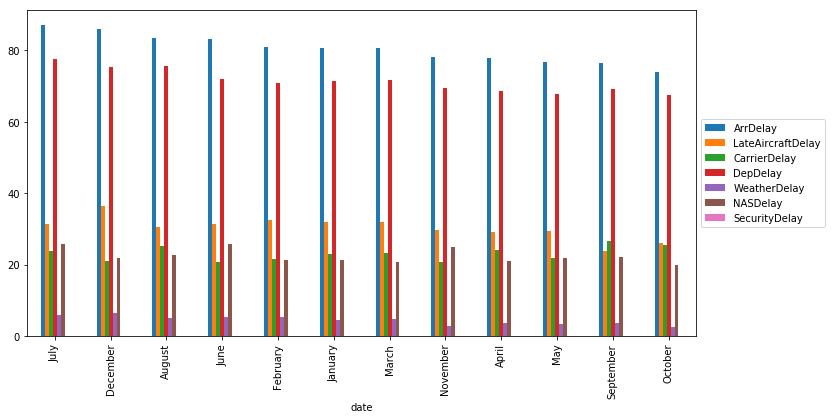

In [32]:
arrivals[arrivals.Late_arrivals==1].groupby(arrivals.date.dt.strftime('%B'))['ArrDelay','LateAircraftDelay','CarrierDelay',
                                                        'DepDelay','WeatherDelay','NASDelay','SecurityDelay'].mean().sort_values(by='ArrDelay',ascending=False).plot(kind='bar',figsize=(12,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


We always seem to feel like weather would be the major cause of flight delays. The above chart shows that weather delays are second to only security delays which are virtually non-existent.

In [33]:
arrivals[arrivals.Late_arrivals==1].groupby(arrivals.date.dt.strftime('%B')).ArrDelay.mean()

date
April        77.808272
August       83.576618
December     85.887263
February     80.805875
January      80.770546
July         86.958864
June         83.202780
March        80.528385
May          76.853549
November     77.996353
October      74.030610
September    76.360381
Name: ArrDelay, dtype: float64

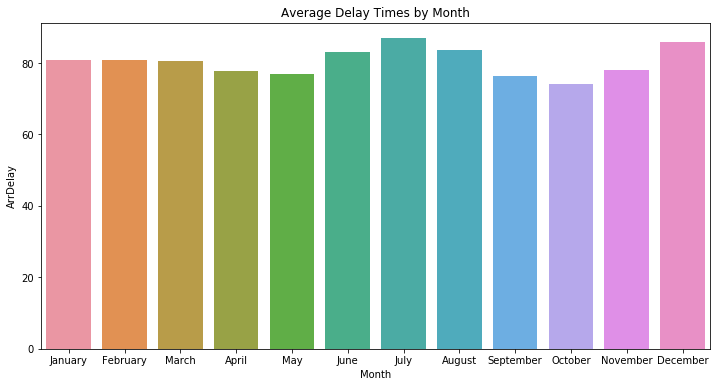

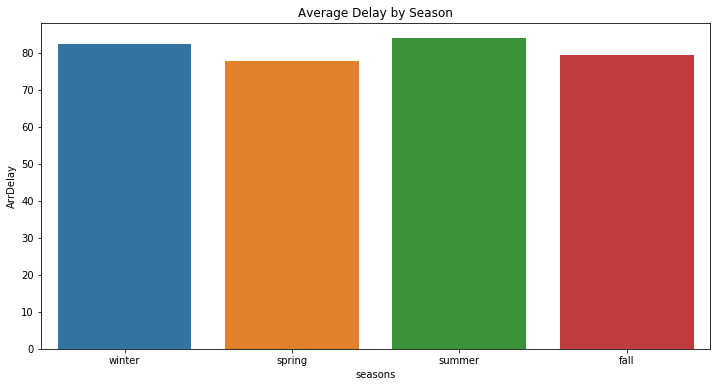

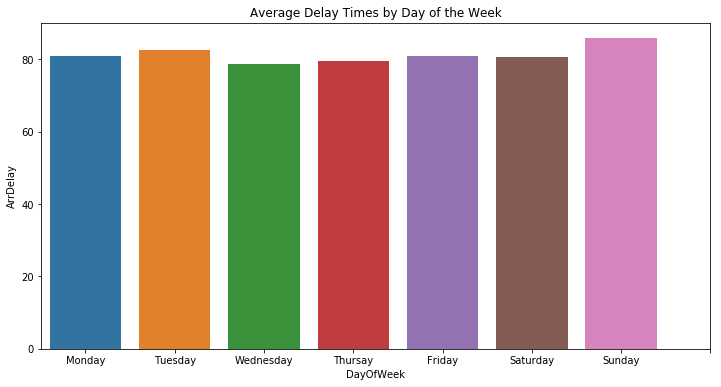

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(arrivals.sort_values(by='date').date.dt.strftime('%B'),arrivals[arrivals.Late_arrivals==1].ArrDelay, ci=None)
plt.title('Average Delay Times by Month') 
plt.xlabel('Month')
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(arrivals.seasons,arrivals[arrivals.Late_arrivals==1].ArrDelay,ci=None)
plt.title('Average Delay by Season')
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(arrivals.DayOfWeek,arrivals[arrivals.Late_arrivals==1].ArrDelay,ci=None)
plt.title('Average Delay Times by Day of the Week')
plt.xticks([0,1,2,3,4,5,6,7], ["Monday", "Tuesday", "Wednesday", "Thursay","Friday","Saturday","Sunday"])
plt.show()




The above bar plots are the average delay times in minutes for looking at late arrivals only (arrivals that were more than 30 min delayed)

In [35]:
 arrivals.groupby(by=arrivals.date.dt.strftime('%B')).ArrDelay.describe()

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
April,586723.0,6.807297,35.330544,-89.0,-10.0,-2.0,11.0,2453.0
August,600750.0,6.910915,38.390843,-92.0,-11.0,-3.0,9.0,1359.0
December,524747.0,16.680505,48.570617,-90.0,-8.0,2.0,23.0,1655.0
February,546925.0,13.077837,42.510286,-90.0,-8.0,1.0,18.0,2461.0
January,587130.0,10.188856,39.800727,-91.0,-10.0,0.0,15.0,1525.0
July,615423.0,9.975050,42.034384,-109.0,-10.0,-2.0,12.0,1510.0
June,595458.0,13.266756,42.788612,-87.0,-8.0,0.0,17.0,1707.0
March,598343.0,11.192365,40.478498,-86.0,-9.0,0.0,16.0,1490.0
May,599210.0,5.978448,33.994879,-129.0,-10.0,-2.0,10.0,1951.0


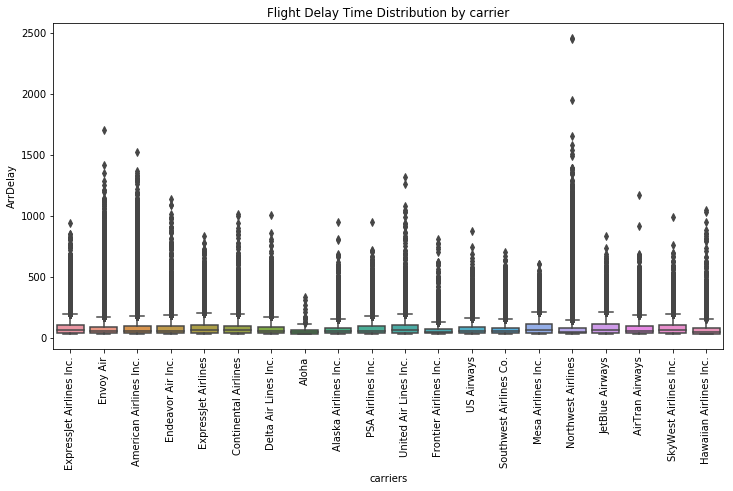

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(arrivals[arrivals.Late_arrivals==1].sort_values(by='date').carriers,arrivals.ArrDelay)
plt.title('Flight Delay Time Distribution by carrier')
plt.xticks(rotation=90)
plt.show()
 

It looks like there may be a few outliers that could affect some of out models

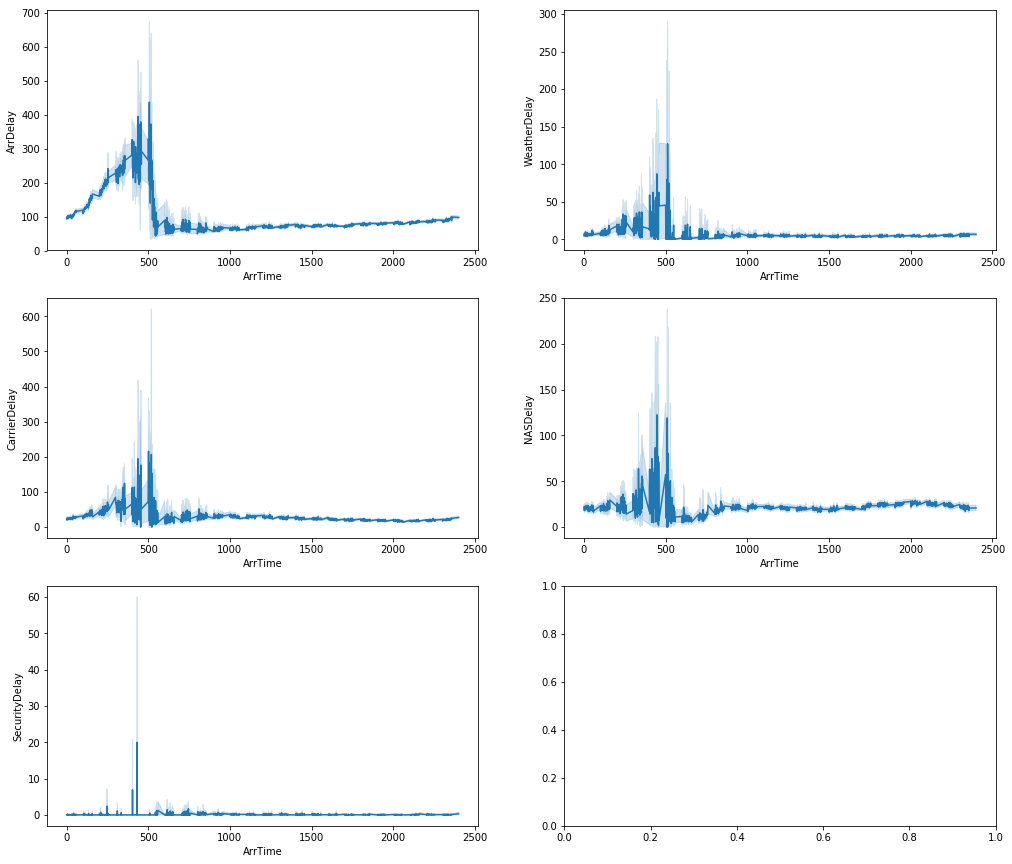

In [40]:
# plot of types of delays by time

plt.figure(figsize=(17, 15))

plt.subplot(3,2,1)
sns.lineplot(arrivals[arrivals.Late_arrivals==1]['ArrTime'].sort_values(), arrivals['ArrDelay'])
plt.subplot(3,2,2)
sns.lineplot(arrivals[arrivals.Late_arrivals==1]['ArrTime'].sort_values(), arrivals['WeatherDelay'])
plt.subplot(3,2,3)
sns.lineplot(arrivals[arrivals.Late_arrivals==1]['ArrTime'].sort_values(), arrivals['CarrierDelay']) 
plt.subplot(3,2,4)
sns.lineplot(arrivals[arrivals.Late_arrivals==1]['ArrTime'].sort_values(), arrivals['NASDelay'])
plt.subplot(3,2,5)
sns.lineplot(arrivals[arrivals.Late_arrivals==1]['ArrTime'].sort_values(), arrivals['SecurityDelay'])

plt.show()

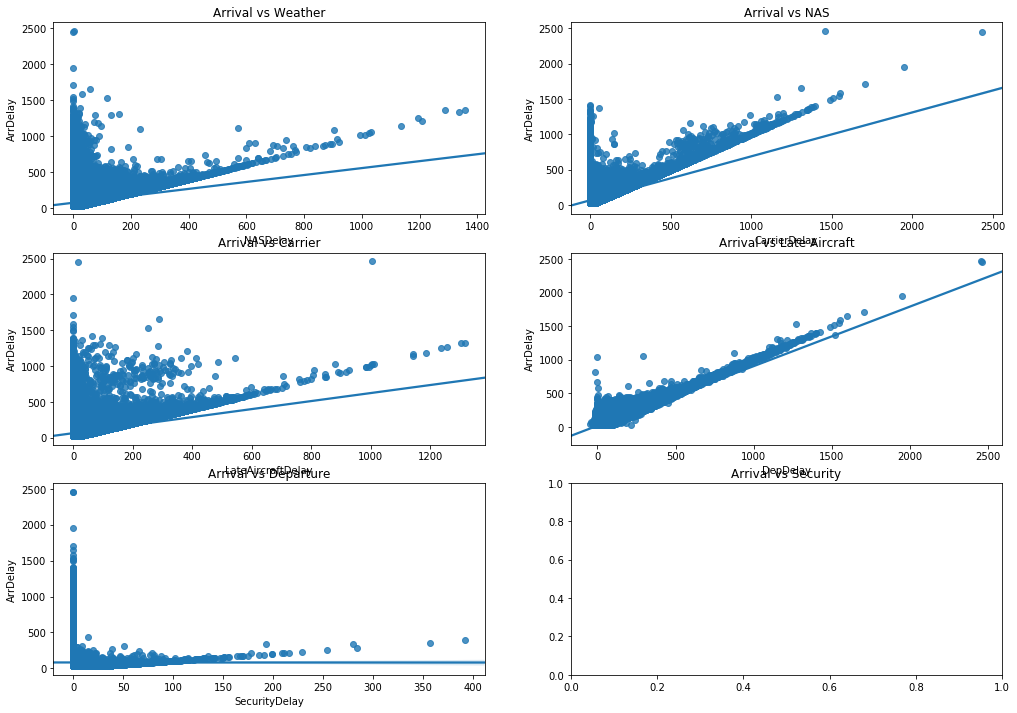

In [41]:
# Ploting relationship of arrival delay to other types of where arrival delay is greater that 30 min.

plt.figure(figsize=(19, 12))
sns.regplot(arrivals[arrivals.Late_arrivals==1].WeatherDelay, arrivals[arrivals.Late_arrivals==1].ArrDelay)
plt.subplot(3,2,1)
plt.title('Arrival vs Weather')
sns.regplot(arrivals[arrivals.Late_arrivals==1].NASDelay, arrivals[arrivals.Late_arrivals==1].ArrDelay)
plt.subplot(3,2,2)
plt.title('Arrival vs NAS')
sns.regplot(arrivals[arrivals.Late_arrivals==1].CarrierDelay, arrivals[arrivals.Late_arrivals==1].ArrDelay)
plt.subplot(3,2,3)
plt.title('Arrival vs Carrier')
sns.regplot(arrivals[arrivals.Late_arrivals==1].LateAircraftDelay, arrivals[arrivals.Late_arrivals==1].ArrDelay)
plt.subplot(3,2,4)
plt.title('Arrival vs Late Aircraft')
sns.regplot(arrivals[arrivals.Late_arrivals==1].DepDelay, arrivals[arrivals.Late_arrivals==1].ArrDelay)
plt.subplot(3,2,5)
plt.title('Arrival vs Departure')
sns.regplot(arrivals[arrivals.Late_arrivals==1].SecurityDelay, arrivals[arrivals.Late_arrivals==1].ArrDelay)
plt.subplot(3,2,6)
plt.title('Arrival vs Security')
plt.show()

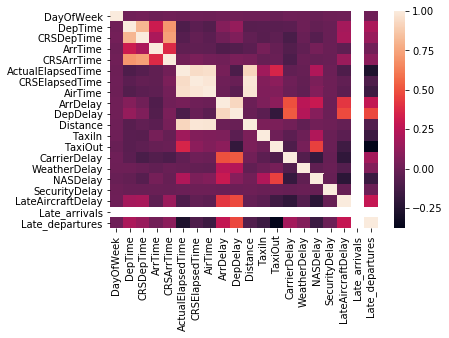

In [44]:
sns.heatmap(arrivals[arrivals.Late_arrivals==1].corr())
plt.show()

# MODELING

In [45]:
a = arrivals.sample(frac=.001)
len(a)

6855

### Preprocessing

In [46]:
features =  ['DayOfWeek', 'DepTime', 'CRSDepTime',   'CRSArrTime',
             'ActualElapsedTime','CRSElapsedTime', 'AirTime','DepDelay',  
             'Distance', 'TaxiIn', 'TaxiOut',   'CarrierDelay','WeatherDelay',
               'SecurityDelay',  'LateAircraftDelay', 
             'Late_departures']

Y = arrivals['Late_arrivals'] 
X = arrivals[features]



from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)

 # Automatic feature selection with SelectKbest
import sklearn.feature_selection 
select =sklearn.feature_selection.SelectKBest()
selected_features = select.fit(X_train, y_train)
indicies_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indicies_selected]
X_selected = X[colnames_selected]
print(colnames_selected)
x_train_selected = X_train[colnames_selected]
x_test_selected = X_test[colnames_selected]

X = arrivals[colnames_selected]
Y = arrivals['Late_arrivals']

# Standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train_selected) 
X_train = scaler.transform(x_train_selected)
X_test = scaler.transform(x_test_selected)


['DepTime', 'CRSDepTime', 'CRSArrTime', 'ActualElapsedTime', 'DepDelay', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'LateAircraftDelay', 'Late_departures']


c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.


In [47]:
 # Create balanced classes for the training set
import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=20)
X_train, y_train = ros.fit_sample(X_train, y_train)


In [48]:
pd.Series(y_train).value_counts()

1    4763600
0    4763600
dtype: int64

# MODELING

# Naive Bayes

One of the assumption for the Naive Bayes model is that the features are independent. We will drop the 1,0 and, 4 columns from the scaled data since they correlate highly with each other. 

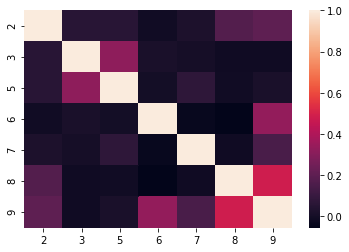

In [49]:
X_trainNB = pd.DataFrame(X_train).drop([1,0,4],1)
X_testNB = pd.DataFrame(X_test).drop([1,0,4],1)

sns.heatmap(pd.DataFrame(X_train).drop([1,0,4],1).corr())

In [51]:
# Instatiate the model
from sklearn.naive_bayes import BernoulliNB 
bnb = BernoulliNB()
bnb.fit(X_trainNB, y_train)
y_pred = bnb.predict(X_testNB)
print(bnb.score(X_testNB, y_test))
from sklearn.model_selection import cross_val_score

print(cross_val_score(bnb, X_testNB, y_test, cv=5,scoring='roc_auc'))

0.9376457871081527
[0.96722262 0.96779515 0.96748219 0.96719042 0.96739294]


Consfusion Matrix
col_0                0       1
Late_arrivals                 
0              1124335   65696
1                19792  161183

Classification Report
              precision    recall  f1-score   support

     On-time       0.98      0.94      0.96   1190031
        Late       0.71      0.89      0.79    180975

   micro avg       0.94      0.94      0.94   1371006
   macro avg       0.85      0.92      0.88   1371006
weighted avg       0.95      0.94      0.94   1371006

AUC: 0.967


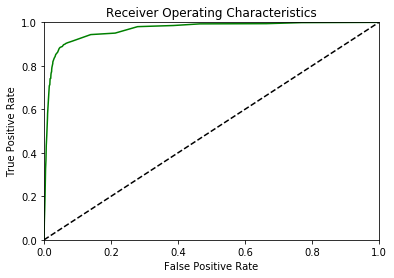

In [52]:
# Confusion matrix
y_pred = bnb.predict(X_testNB) 
print("Consfusion Matrix")
print(pd.crosstab(y_test, y_pred))
print()


# Classification report
from sklearn.metrics import classification_report

print("Classification Report") 
target_names = ['On-time','Late']
print(classification_report(y_test ,y_pred, target_names=target_names))
# plot ROC
# Function that prints AUC and plots ROC curve
def AUC_ROC_plot(model,X,y): 
    y_prob = cross_val_predict(model, X, y, method='predict_proba',cv=5)    
    auc = roc_auc_score(y,y_prob[:,1])
    print('AUC: %.3f' % auc)
    fpr, tpr,thresholds = roc_curve(y,y_prob[:,1])
    plt.plot(fpr,tpr,'g')    
    plt.plot([0.0,1.0],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristics')
    plt.xlim([0.0,1.0])     
    plt.ylim([0.0,1.0])
AUC_ROC_plot(bnb,X_testNB,y_test)

Consfusion Matrix
Late_arrivals        0       1
row_0                         
0              1124335   19792
1                65696  161183

Classification Report
              precision    recall  f1-score   support

     On-time       0.98      0.94      0.96   1190031
        Late       0.71      0.89      0.79    180975

   micro avg       0.94      0.94      0.94   1371006
   macro avg       0.85      0.92      0.88   1371006
weighted avg       0.95      0.94      0.94   1371006

AUC: 0.967


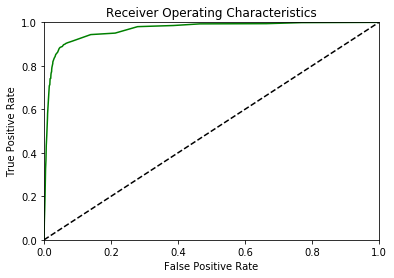

In [53]:
# Confusion matrix
y_pred = bnb.predict(X_testNB) 
print("Consfusion Matrix")
print(pd.crosstab(y_pred, y_test))
print()


# Classification report
print("Classification Report") 
print(classification_report(y_test ,y_pred, target_names=target_names))
# plot ROC
AUC_ROC_plot(bnb,X_testNB,y_test)

The model is running pretty well but its catching more on-time flight than the late flight. We can try to binarize to see if we can catch more late arrivals

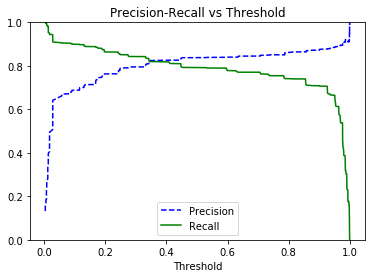

In [54]:
# fuction for prcision recall plot 
def precision_recall_plot (model,X,y):
    y_prob = cross_val_predict(model, X, y, method='predict_proba',cv=10)
    precisions, recalls,thresholds=precision_recall_curve(y, y_prob[:,1])
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.title('Precision-Recall vs Threshold')
    plt.xlabel("Threshold")
    plt.legend(loc="best")
    plt.ylim([0,1])
precision_recall_plot (bnb,X_testNB,y_test) 
plt.show()

In [55]:
y_prob = bnb.predict_proba(X_testNB)
y_pred_class = binarize(y_prob,0.7)
y_pred_class = y_pred_class[:,1]
 

 
print('Confusion Matrix with binarized class:')
print(pd.crosstab( y_test,y_pred_class))
print()
print('Classification report with binarized class:') 
print(classification_report(y_test ,y_pred_class, target_names=target_names))


Confusion Matrix with binarized class:
col_0              0.0     1.0
Late_arrivals                 
0              1149194   40837
1                26924  154051

Classification report with binarized class:
              precision    recall  f1-score   support

     On-time       0.98      0.97      0.97   1190031
        Late       0.79      0.85      0.82    180975

   micro avg       0.95      0.95      0.95   1371006
   macro avg       0.88      0.91      0.90   1371006
weighted avg       0.95      0.95      0.95   1371006



Still catching more of the on-time arrivals most likely because our we have a very unbalanced test set. Similar results will be expected in the next tested models.

### Logistic regression

In [56]:
# Instantiate and fit our model.
lr = linear_model.LogisticRegression(solver='lbfgs')

lr.fit(X_train,y_train)

 
from sklearn.model_selection import cross_val_score
print('Accuracy score :',lr.score( X_test , y_test,))
print('ROC_AUC cross validataion score: ',cross_val_score(lr, X_test , y_test, cv=5,scoring='roc_auc'))
 
 
 
# Inspect the results.
print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)
print('\nR-squared:')
print(lr.score(X_test, y_test))

Accuracy score : 0.9507923378891121
ROC_AUC cross validataion score:  [0.98586588 0.98601721 0.98641409 0.98578518 0.986079  ]

Coefficients: 
 [[ 0.22351144 -0.34230404 -0.05775512  0.51277836  3.28638501  1.30125011
   1.63226161  0.96139782  1.88830298  0.1354244 ]]

Intercept: 
 [-1.77022393]

R-squared:
0.9507923378891121


Consfusion Matrix
Late_arrivals        0       1
row_0                         
0              1109154    8288
1                80877  172687

Classification Report
              precision    recall  f1-score   support

     On-time       0.99      0.93      0.96   1190031
        Late       0.68      0.95      0.79    180975

   micro avg       0.93      0.93      0.93   1371006
   macro avg       0.84      0.94      0.88   1371006
weighted avg       0.95      0.93      0.94   1371006

AUC: 0.984


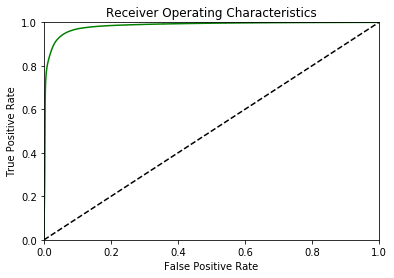

In [59]:
# Confusion matrix
y_pred = lr.predict(X_test) 
print("Consfusion Matrix")
print(pd.crosstab(y_pred, y_test))
print()


# Classification report
print("Classification Report") 
print(classification_report(y_test ,y_pred, target_names=target_names))
# plot ROC
AUC_ROC_plot(lr, X_test,y_test)

In [55]:
# Tuning hyperparameters
param_grid = dict(solver=('lbfgs','liblinear'))
grid = GridSearchCV(lr, param_grid, cv=5, scoring="roc_auc", return_train_score=True)
grid.fit(X_train, y_train)


print(grid.best_params_)
print(grid.best_score_ )

{'solver': 'liblinear'}
0.9843988537221986


In [60]:
# Instantiate and fit our model.
 
lr = LogisticRegression(random_state=20, fit_intercept=False ,solver='liblinear',class_weight='balanced') 
lr.fit(X_train,y_train)


print('With 20% Holdout: ' + str(lr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(lr.fit( X_test , y_test).score(X_test, y_test)))
print()
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr, X_test, y_test, cv=10))
 
 
 
# Inspect the results.
print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)
print('\nR-squared:')
print(lr.score(X_test, y_test))


With 20% Holdout: 0.9349105693191715
Testing on Sample: 0.9349638148921303

[0.93432627 0.93459566 0.93571892 0.93449355 0.93488742 0.93586433
 0.93609044 0.93379285 0.93532458 0.93468271]

Coefficients: 
 [[ 0.03775503 -0.16195999 -0.05630057  0.3224255   2.31257772  0.99443356
   1.98651692 10.66643585  2.55811069  0.29449968]]

Intercept: 
 0.0

R-squared:
0.9349638148921303


Consfusion Matrix
Late_arrivals        0       1
row_0                         
0              1109154    8288
1                80877  172687

Classification Report
              precision    recall  f1-score   support

     On-time       0.99      0.93      0.96   1190031
        Late       0.68      0.95      0.79    180975

   micro avg       0.93      0.93      0.93   1371006
   macro avg       0.84      0.94      0.88   1371006
weighted avg       0.95      0.93      0.94   1371006

AUC: 0.984


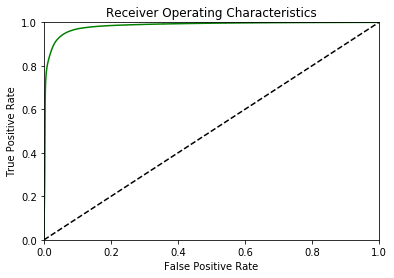

In [61]:
# Confusion matrix
y_pred = lr.predict(X_test) 
print("Consfusion Matrix")
print(pd.crosstab(y_pred, y_test))
print()


# Classification report
print("Classification Report") 
print(classification_report(y_test ,y_pred, target_names=target_names))
# plot ROC
AUC_ROC_plot(lr, X_test,y_test)

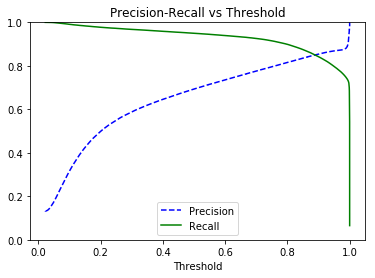

In [62]:
precision_recall_plot (lr,X_testNB,y_test) 
plt.show()

In [63]:
y_prob = lr.predict_proba(X_test)
y_pred_class = binarize(y_prob,0.44)
y_pred_class = y_pred_class[:,1]
 
 
print('Confusion Matrix with binarized class:')
print(pd.crosstab( y_test,y_pred_class))
print()
print('Classification report with binarized class:') 
print(classification_report(y_test ,y_pred_class, target_names=target_names))


Confusion Matrix with binarized class:
col_0              0.0     1.0
Late_arrivals                 
0              1098766   91265
1                 7247  173728

Classification report with binarized class:
              precision    recall  f1-score   support

     On-time       0.99      0.92      0.96   1190031
        Late       0.66      0.96      0.78    180975

   micro avg       0.93      0.93      0.93   1371006
   macro avg       0.82      0.94      0.87   1371006
weighted avg       0.95      0.93      0.93   1371006



 ### KNN 
 

In [ ]:
from sklearn import neighbors
# Build our model.
knn = neighbors.KNeighborsClassifier(n_neighbors=10) 
knn.fit(X_train, y_train)


print('Accuracy score :',knn.score( X_test , y_test,))
print('ROC_AUC cross validataion score: ',cross_val_score(knn, X_test , y_test, cv=5,scoring='roc_auc'))

In [ ]:
# Confusion matrix
y_pred = lr.predict(X_test) 
print("Consfusion Matrix")
print(pd.crosstab(y_pred, y_test))
print()


# Classification report
print("Classification Report") 
print(classification_report(y_test ,y_pred, target_names=target_names))
# plot ROC
AUC_ROC_plot(lr, X_test,y_test)

In [64]:
#Gridsearch CV

param_grid = dict(leaf_size=range(1,30),p=(1,2),n_neighbors=range(1,18),weights=['distance','uniform'])
grid = GridSearchCV(knn, param_grid, cv=3, scoring="auc_roc", return_train_score=True,n_jobs = -1)
grid.fit(X_train, y_train)


print(grid.best_params_)
print(grid.best_score_ )

{'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.954070981210856


In [68]:
#fit with new parameters
knn = neighbors.KNeighborsClassifier(n_neighbors=1,p=1,leaf_size=1,weights='distance') 
knn.fit(X_train, y_train)


print('Accuracy score :',knn.score( X_test , y_test,))
print('ROC_AUC cross validataion score: ',cross_val_score(knn, X_test , y_test, cv=5,scoring='roc_auc'))

Accuracy score : 0.9562363238512035
ROC_AUC cross validataion score:  [0.88111702 0.91223404 0.88111702 0.90384615 0.8482906 ]


Consfusion Matrix
Late_arrivals     0    1
row_0                   
0              1123    9
1                50  189

Classification Report
              precision    recall  f1-score   support

     on-time       0.99      0.96      0.97      1173
        late       0.79      0.95      0.86       198

   micro avg       0.96      0.96      0.96      1371
   macro avg       0.89      0.96      0.92      1371
weighted avg       0.96      0.96      0.96      1371

AUC: 0.989


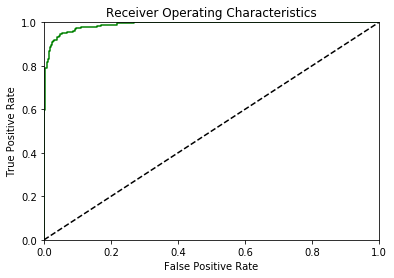

In [132]:
# Confusion matrix
y_pred = lr.predict(X_test) 
print("Consfusion Matrix")
print(pd.crosstab(y_pred, y_test))
print()


# Classification report
print("Classification Report") 
print(classification_report(y_test ,y_pred, target_names=target_names))
# plot ROC
AUC_ROC_plot(lr, X_test,y_test)

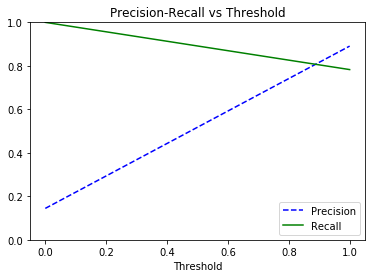

In [74]:
precision_recall_plot (knn,X_test,y_test) 
plt.show()

In [ ]:
y_prob = knn.predict_proba(X_test)
y_pred_class = binarize(y_prob,0.44)
y_pred_class = y_pred_class[:,1]
 

print('Confusion Matrix with binarized class:')
print(pd.crosstab( y_test,y_pred_class))
print()
print('Classification report with binarized class:') 
print(classification_report(y_test ,y_pred_class, target_names=target_names))


### Decision Trees

In [77]:
from sklearn.tree import DecisionTreeClassifier
# Fit regression tree model
tree = DecisionTreeClassifier(max_depth=2,random_state=20) 
tree.fit(X_train, y_train)


print('Accuracy score :',tree.score( X_test , y_test,))
print('ROC_AUC cross validataion score: ',cross_val_score(tree, X_test , y_test, cv=5,scoring='roc_auc'))

Accuracy score : 0.9562363238512035
ROC_AUC cross validataion score:  [0.88111702 0.91223404 0.88111702 0.90384615 0.8482906 ]


Consfusion Matrix
Late_arrivals     0    1
row_0                   
0              1047    8
1               126  190

Classification Report
              precision    recall  f1-score   support

     on-time       0.99      0.89      0.94      1173
        late       0.60      0.96      0.74       198

   micro avg       0.90      0.90      0.90      1371
   macro avg       0.80      0.93      0.84      1371
weighted avg       0.94      0.90      0.91      1371

AUC: 0.925


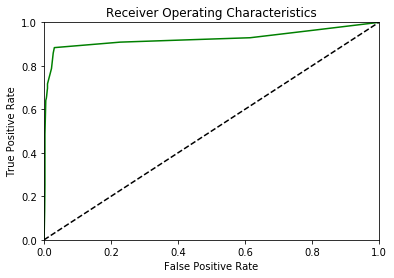

In [134]:
y_pred = tree.predict(X_test)

# Confusion matrix
print("Consfusion Matrix")
print(pd.crosstab(y_pred, y_test))
print()

# Classification report
print("Classification Report")
from sklearn.metrics import classification_report

 
print(classification_report(y_test ,y_pred, target_names=target_names))
# plot ROC
AUC_ROC_plot(tree, X_test,y_test)

In [80]:
param_grid = dict(max_depth=range(1,5),max_leaf_nodes=range(6,20),max_features=['sqrt',4])
grid = GridSearchCV(tree, param_grid, cv=3, scoring="r2", return_train_score=True,n_jobs = -1)
grid.fit(X_train, y_train)


print(grid.best_params_)
print(grid.best_score_ )

{'max_depth': 4, 'max_features': 4, 'max_leaf_nodes': 16}
0.8091858037578288


AUC: 0.925


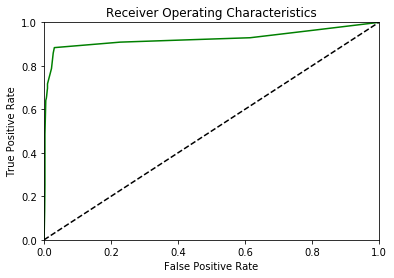

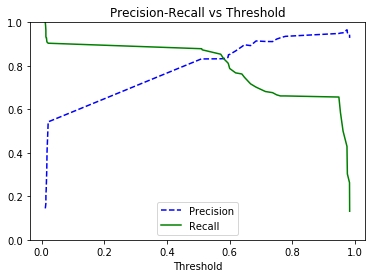

Confusion Matrix:
col_0             0    1
Late_arrivals           
0              1047  126
1                 8  190

Classification Report
              precision    recall  f1-score   support

     on-time       0.99      0.89      0.94      1173
        late       0.60      0.96      0.74       198

   micro avg       0.90      0.90      0.90      1371
   macro avg       0.80      0.93      0.84      1371
weighted avg       0.94      0.90      0.91      1371


Confusion Matrix with binarized class:
col_0           0.0  1.0
Late_arrivals           
0              1047  126
1                 8  190

Classification report with binarized class:
              precision    recall  f1-score   support

     on-time       0.99      0.89      0.94      1173
        late       0.60      0.96      0.74       198

   micro avg       0.90      0.90      0.90      1371
   macro avg       0.80      0.93      0.84      1371
weighted avg       0.94      0.90      0.91      1371



In [135]:
# plot ROC
AUC_ROC_plot(tree, X_test,y_test)
plt.show()
precision_recall_plot (tree,X_test,y_test) 
plt.show()

y_prob = tree.predict_proba(X_test)
y_pred_class = binarize(y_prob,0.44)
y_pred_class = y_pred_class[:,1]
 

print('Confusion Matrix:')
print(pd.crosstab( y_test,y_pred))
print()
print('Classification Report')
print(classification_report(y_test ,y_pred, target_names=target_names))
print()

print('Confusion Matrix with binarized class:')
print(pd.crosstab( y_test,y_pred_class))
print()
print('Classification report with binarized class:') 
print(classification_report(y_test ,y_pred_class, target_names=target_names))


### Random forrest

In [93]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(criterion='entropy',random_state=20, max_features='sqrt') 
rf.fit(X_train,y_train)


print('Accuracy score :',rf.score( X_test , y_test,))
print('ROC_AUC cross validataion score: ',cross_val_score(rf, X_test , y_test, cv=5,scoring='roc_auc'))

Accuracy score : 0.9744711889132021
ROC_AUC cross validataion score:  [0.9712234  0.9912766  0.95170213 0.9689897  0.9470195 ]


c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Consfusion Matrix
Late_arrivals     0    1
row_0                   
0              1161   23
1                12  175

Classification Report
              precision    recall  f1-score   support

     on-time       0.98      0.99      0.99      1173
        late       0.94      0.88      0.91       198

   micro avg       0.97      0.97      0.97      1371
   macro avg       0.96      0.94      0.95      1371
weighted avg       0.97      0.97      0.97      1371

AUC: 0.966


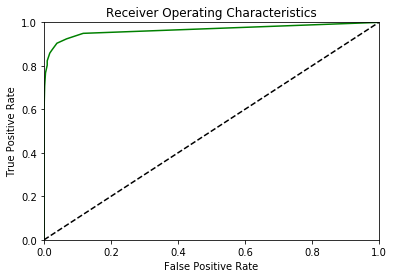

In [94]:
y_pred = rf.predict(X_test)

# Confusion matrix
print("Consfusion Matrix")
print(pd.crosstab(y_pred, y_test))
print()

# Classification report
print("Classification Report")
from sklearn.metrics import classification_report

 
print(classification_report(y_test ,y_pred, target_names=target_names))
# plot ROC
AUC_ROC_plot(rf, X_test,y_test)

In [98]:
param_grid = dict(max_depth=range(1,5),max_leaf_nodes=range(6,20),max_features=['sqrt',4,'auto'],criterion=('gini','entropy'))
grid = GridSearchCV(rf, param_grid, cv=3, scoring="roc_auc", return_train_score=True,n_jobs = -1)
grid.fit(X_train, y_train)


print(grid.best_params_)
print(grid.best_score_ )

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 4, 'max_leaf_nodes': 19}
0.9899736404519599


In [99]:
rf = ensemble.RandomForestClassifier(criterion='entropy',random_state=20, max_features=4, max_leaf_nodes=19, max_depth=4) 
rf.fit(X_train,y_train)


print('Accuracy score :',rf.score( X_test , y_test,))
print('ROC_AUC cross validataion score: ',cross_val_score(rf, X_test , y_test, cv=5,scoring='roc_auc'))

Accuracy score : 0.950401167031364
ROC_AUC cross validataion score:  [0.98510638 0.99468085 0.98542553 0.97534517 0.97885163]


c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Consfusion Matrix
Late_arrivals     0    1
row_0                   
0              1117   12
1                56  186

AUC: 0.978


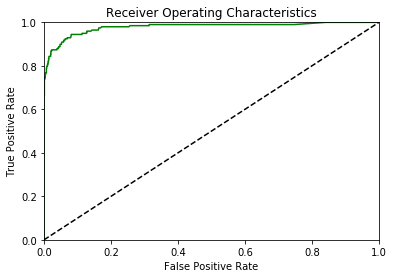

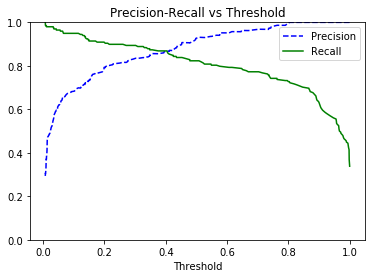

Confusion Matrix:
col_0             0    1
Late_arrivals           
0              1117   56
1                12  186

Classification Report
              precision    recall  f1-score   support

     on-time       0.99      0.95      0.97      1173
        late       0.77      0.94      0.85       198

   micro avg       0.95      0.95      0.95      1371
   macro avg       0.88      0.95      0.91      1371
weighted avg       0.96      0.95      0.95      1371


Confusion Matrix with binarized class:
col_0           0.0  1.0
Late_arrivals           
0              1110   63
1                10  188

Classification report with binarized class:
              precision    recall  f1-score   support

     on-time       0.99      0.95      0.97      1173
        late       0.75      0.95      0.84       198

   micro avg       0.95      0.95      0.95      1371
   macro avg       0.87      0.95      0.90      1371
weighted avg       0.96      0.95      0.95      1371

Classification Repor

In [130]:
y_pred = rf.predict(X_test)

# Confusion matrix
print("Consfusion Matrix")
print(pd.crosstab(y_pred, y_test))
print()# plot ROC
AUC_ROC_plot(rf, X_test,y_test)
plt.show()
precision_recall_plot (rf,X_test,y_test) 
plt.show()

y_prob = rf.predict_proba(X_test)
y_pred_class = binarize(y_prob,0.44)
y_pred_class = y_pred_class[:,1]
 

print('Confusion Matrix:')
print(pd.crosstab( y_test,y_pred))
print()
print('Classification Report')
print(classification_report(y_test ,y_pred, target_names=target_names))
print()

print('Confusion Matrix with binarized class:')
print(pd.crosstab( y_test,y_pred_class))
print()
print('Classification report with binarized class:') 
print(classification_report(y_test ,y_pred_class, target_names=target_names))


# Classification report
print("Classification Report")
from sklearn.metrics import classification_report


print(classification_report(y_test ,y_pred, target_names=target_names)) 

### Support Vector Machine

In [104]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
svm = SVC(kernel = 'linear', probability=True)
svm.fit(X_train, y_train)


print('Accuracy score :',svm.score( X_test , y_test,))
print('ROC_AUC cross validataion score: ',cross_val_score(svm, X_test , y_test, cv=5,scoring='roc_auc'))

Accuracy score : 0.9540481400437637
ROC_AUC cross validataion score:  [0.98914894 0.99244681 0.99021277 0.9785229  0.98465922]


Consfusion Matrix
Late_arrivals     0    1
row_0                   
0              1118    8
1                55  190

Classification Report
              precision    recall  f1-score   support

     on-time       0.99      0.95      0.97      1173
        late       0.78      0.96      0.86       198

   micro avg       0.95      0.95      0.95      1371
   macro avg       0.88      0.96      0.92      1371
weighted avg       0.96      0.95      0.96      1371

AUC: 0.987


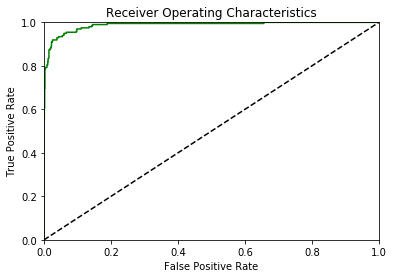

In [129]:
y_pred = svm.predict(X_test)

# Confusion matrix
print("Consfusion Matrix")
print(pd.crosstab(y_pred, y_test))
print()

# Classification report
print("Classification Report")
from sklearn.metrics import classification_report

 
print(classification_report(y_test ,y_pred, target_names=target_names))
# plot ROC
AUC_ROC_plot(svm, X_test,y_test)

In [107]:
param_grid = dict(C=np.arange(.1,5,.1))
grid = GridSearchCV(svm, param_grid, cv=3, scoring="roc_auc", return_train_score=True,n_jobs = -1)
grid.fit(X_train, y_train)


print(grid.best_params_)
print(grid.best_score_ )

{'C': 0.1}
0.9909954878745475


In [109]:
# Instantiate our model and fit the data.
svm = SVC(kernel = 'linear', probability=True)
svm.fit(X_train, y_train)


print('Accuracy score :',svm.score( X_test , y_test,))
print('ROC_AUC cross validataion score: ',cross_val_score(svm, X_test , y_test, cv=5,scoring='roc_auc'))

Accuracy score : 0.9540481400437637
ROC_AUC cross validataion score:  [0.98914894 0.99244681 0.99021277 0.9785229  0.98465922]


Consfusion Matrix
Late_arrivals     0    1
row_0                   
0              1118    8
1                55  190

AUC: 0.987


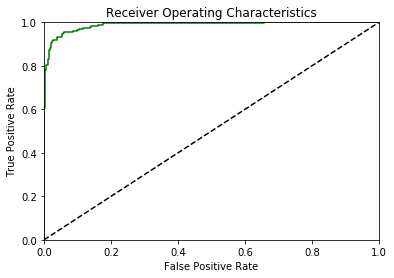

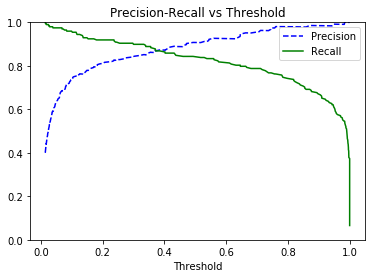

Confusion Matrix:
col_0             0    1
Late_arrivals           
0              1118   55
1                 8  190

Classification Report
              precision    recall  f1-score   support

     on-time       0.99      0.95      0.97      1173
        late       0.78      0.96      0.86       198

   micro avg       0.95      0.95      0.95      1371
   macro avg       0.88      0.96      0.92      1371
weighted avg       0.96      0.95      0.96      1371


Confusion Matrix with binarized class:
col_0           0.0  1.0
Late_arrivals           
0              1115   58
1                 8  190

Classification report with binarized class:
              precision    recall  f1-score   support

     on-time       0.99      0.95      0.97      1173
        late       0.77      0.96      0.85       198

   micro avg       0.95      0.95      0.95      1371
   macro avg       0.88      0.96      0.91      1371
weighted avg       0.96      0.95      0.95      1371

Classification Repor

In [136]:
y_pred = svm.predict(X_test)

# Confusion matrix
print("Consfusion Matrix")
print(pd.crosstab(y_pred, y_test))
print()# plot ROC
AUC_ROC_plot(svm, X_test,y_test)
plt.show()
precision_recall_plot (svm,X_test,y_test) 
plt.show()

y_prob = svm.predict_proba(X_test)
y_pred_class = binarize(y_prob,0.44)
y_pred_class = y_pred_class[:,1]
 

print('Confusion Matrix:')
print(pd.crosstab( y_test,y_pred))
print()
print('Classification Report')
print(classification_report(y_test ,y_pred, target_names=target_names))
print()

print('Confusion Matrix with binarized class:')
print(pd.crosstab( y_test,y_pred_class))
print()
print('Classification report with binarized class:') 
print(classification_report(y_test ,y_pred_class, target_names=target_names))


# Classification report
print("Classification Report")
from sklearn.metrics import classification_report

 
print(classification_report(y_test ,y_pred, target_names=target_names)) 

### Gradient boost

In [117]:
from sklearn import ensemble 
 
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(random_state=20) 
clf.fit(X_train, y_train)


print('Accuracy score :',clf.score( X_test , y_test,))
print('ROC_AUC cross validataion score: ',cross_val_score(clf, X_test , y_test, cv=5,scoring='roc_auc'))

Accuracy score : 0.9569657184536834
ROC_AUC cross validataion score:  [0.9943617  0.99234043 0.98659574 0.98301556 0.98416612]


Consfusion Matrix
Late_arrivals     0    1
row_0                   
0              1153   23
1                20  175

Classification Report
              precision    recall  f1-score   support

     on-time       0.98      0.98      0.98      1173
        late       0.90      0.88      0.89       198

   micro avg       0.97      0.97      0.97      1371
   macro avg       0.94      0.93      0.94      1371
weighted avg       0.97      0.97      0.97      1371

AUC: 0.981


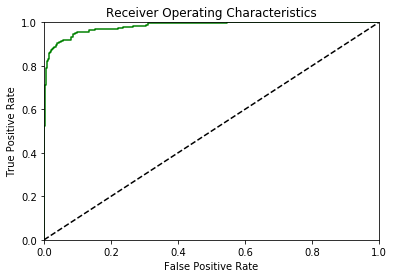

In [128]:
y_pred = clf.predict(X_test)

# Confusion matrix
print("Consfusion Matrix")
print(pd.crosstab(y_pred, y_test))
print()

# Classification report
print("Classification Report")
from sklearn.metrics import classification_report

 
print(classification_report(y_test ,y_pred, target_names=target_names))
# plot ROC
AUC_ROC_plot(clf, X_test,y_test)

In [119]:
param_grid = dict(n_estimators=np.arange(600,1000,100),max_depth=range(1,4),
                  loss=['deviance','exponential'],learning_rate=np.arange(.1,2,.1))
grid = GridSearchCV(clf, param_grid, cv=3, scoring="roc_auc", return_train_score=True,n_jobs = -1)
grid.fit(X_train, y_train)


print(grid.best_params_)
print(grid.best_score_ )

{'learning_rate': 0.9, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 600}
0.9993741797664615


In [121]:
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(loss='exponential', max_depth=3, n_estimators=600, random_state=20,learning_rate=.9) 
clf.fit(X_train, y_train)


print('Accuracy score :',clf.score( X_test , y_test,))
print('ROC_AUC cross validataion score: ',cross_val_score(clf, X_test , y_test, cv=5,scoring='roc_auc'))

Accuracy score : 0.9686360320933625
ROC_AUC cross validataion score:  [0.99170213 0.99180851 0.96840426 0.98641245 0.97205786]


Consfusion Matrix
Late_arrivals     0    1
row_0                   
0              1153   23
1                20  175

AUC: 0.981


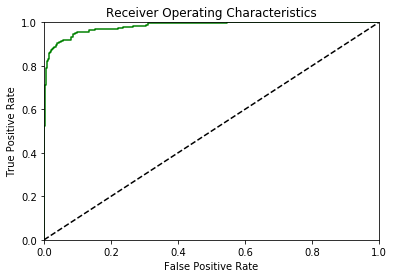

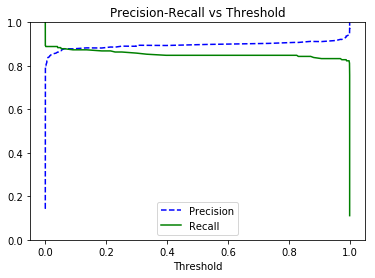

Confusion Matrix:
col_0             0    1
Late_arrivals           
0              1153   20
1                23  175

Classification Report
              precision    recall  f1-score   support

     on-time       0.98      0.98      0.98      1173
        late       0.90      0.88      0.89       198

   micro avg       0.97      0.97      0.97      1371
   macro avg       0.94      0.93      0.94      1371
weighted avg       0.97      0.97      0.97      1371


Confusion Matrix with binarized class:
col_0           0.0  1.0
Late_arrivals           
0              1154   19
1                25  173

Classification report with binarized class:
              precision    recall  f1-score   support

     on-time       0.98      0.98      0.98      1173
        late       0.90      0.87      0.89       198

   micro avg       0.97      0.97      0.97      1371
   macro avg       0.94      0.93      0.93      1371
weighted avg       0.97      0.97      0.97      1371

Classification Repor

In [126]:
y_pred = clf.predict(X_test)

# Confusion matrix
print("Consfusion Matrix")
print(pd.crosstab(y_pred, y_test))
print()# plot ROC
AUC_ROC_plot(clf, X_test,y_test)
plt.show()
precision_recall_plot (clf,X_test,y_test) 
plt.show()

y_prob = clf.predict_proba(X_test)
y_pred_class = binarize(y_prob,0.8)
y_pred_class = y_pred_class[:,1]
 

print('Confusion Matrix:')
print(pd.crosstab( y_test,y_pred))
print()
print('Classification Report')
print(classification_report(y_test ,y_pred, target_names=target_names))
print()

print('Confusion Matrix with binarized class:')
print(pd.crosstab( y_test,y_pred_class))
print()
print('Classification report with binarized class:') 
print(classification_report(y_test ,y_pred_class, target_names=target_names))


# Classification report
print("Classification Report")
from sklearn.metrics import classification_report

 
print(classification_report(y_test ,y_pred, target_names=target_names)) 

In [ ]:
plt.figure(fizsize=(12,12))
AUC_ROC_plot(bnb, X_te,stNB,y_test)
plt.label('Naive Bayes')
AUC_ROC_plot(neighbors, X_test,y_test)
plt.label('KNN')
AUC_ROC_plot(lr, X_test,y_test)
plt.label('Logist Regression')
AUC_ROC_plot(tree, X_test,y_test)
plt.label('Decision Trees')
AUC_ROC_plot(rf, X_test,y_test)
plt.label('Random Forrest')
AUC_ROC_plot(svm, X_test,y_test)
plt.label('Suppot Vector Machines')
AUC_ROC_plot(clf, X_test,y_test)
plt.label('Gradient Boost')